In [1]:
from __future__ import print_function
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import ModelCheckpoint

from ind_rnn import IndRNNCell, RNN

if not os.path.exists('weights'):
    os.makedirs('weights/')

# Parameters taken from https://arxiv.org/abs/1803.04831 ; (above)
TIME_STEPS = 100
NUM_UNITS = 128
LEARNING_RATE = 0.0002
STEPS_PER_EPOCH = 100
NUM_EPOCHS = 100

# Parameters taken from https://arxiv.org/abs/1511.06464
BATCH_SIZE = 50

# Code reused from https://github.com/batzner/indrnn/blob/master/examples/addition_rnn.py
def batch_generator():
    while True:
        """Generate the adding problem dataset"""
        # Build the first sequence
        add_values = np.random.rand(BATCH_SIZE, TIME_STEPS)

        # Build the second sequence with one 1 in each half and 0s otherwise
        add_indices = np.zeros_like(add_values)
        half = int(TIME_STEPS / 2)
        for i in range(BATCH_SIZE):
            first_half = np.random.randint(half)
            second_half = np.random.randint(half, TIME_STEPS)
            add_indices[i, [first_half, second_half]] = 1

        # Zip the values and indices in a third dimension:
        # inputs has the shape (batch_size, time_steps, 2)
        inputs = np.dstack((add_values, add_indices))
        targets = np.sum(np.multiply(add_values, add_indices), axis=1)

        # center at zero mean
        inputs -= np.mean(inputs, axis=0, keepdims=True)

        yield inputs, targets

cells = [IndRNNCell(NUM_UNITS),
         IndRNNCell(NUM_UNITS)]

W0118 00:57:59.609459 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [2]:
print('Build model...')
model = Sequential()
model.add(RNN(cells, input_shape=(TIME_STEPS, 2)))
model.add(Dense(1, activation='linear', bias_initializer=initializers.constant(0.1)))

W0118 00:58:03.351092 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/home/jupyter/workspace/Project/Keras_Irnn/adding_Irnn/ind_rnn.py:143: UserWarning: IndRNNCell: Number of timesteps could not be determined. 
Defaulting to max clipping range of 1.0. 
If this model was trained using a specific timestep during training, inference may be wrong due to this default setting.
Please ensure that you use the same number of timesteps during training and evaluation
  warnings.warn("IndRNNCell: Number of timesteps could not be determined. \n"
W0118 00:58:03.357721 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build model...


In [3]:
# try using different optimizers and different optimizer configs
optimizer = Adam(LEARNING_RATE, amsgrad=True)
model.compile(loss='mse', optimizer='adam')

W0118 00:58:18.187904 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
history = model.fit_generator(batch_generator(), steps_per_epoch=STEPS_PER_EPOCH,epochs=NUM_EPOCHS, verbose=1,callbacks=[ModelCheckpoint('weights/imdb_indrnn_addition.h5', monitor='loss',
                                               save_best_only=True, save_weights_only=True, mode='min')])
    


#history = model.fit(inputs, targets, validation_split=0.0002, epochs=50, batch_size=16, verbose=1)

                    

W0118 00:58:45.109819 139852421502784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0118 00:58:45.189840 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0118 00:58:45.278464 139852421502784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
100/100 [==============================] - 9s 87ms/step - loss: 0.2349
Epoch 2/100
100/100 [==============================] - 8s 76ms/step - loss: 0.1629
Epoch 3/100
100/100 [==============================] - 8s 76ms/step - loss: 0.1631
Epoch 4/100
100/100 [==============================] - 8s 76ms/step - loss: 0.1551
Epoch 5/100
100/100 [==============================] - 8s 77ms/step - loss: 0.1495
Epoch 6/100
100/100 [==============================] - 8s 77ms/step - loss: 0.1396
Epoch 7/100
100/100 [==============================] - 8s 76ms/step - loss: 0.1256
Epoch 8/100
100/100 [==============================] - 8s 76ms/step - loss: 0.1057
Epoch 9/100
100/100 [==============================] - 8s 76ms/step - loss: 0.0833
Epoch 10/100
100/100 [==============================] - 8s 77ms/step - loss: 0.0526
Epoch 11/100
100/100 [==============================] - 7s 75ms/step - loss: 0.0354
Epoch 12/100
100/100 [==============================] - 8s 77ms/step - loss: 0.0286
E

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.plot()

KeyError: 'val_loss'

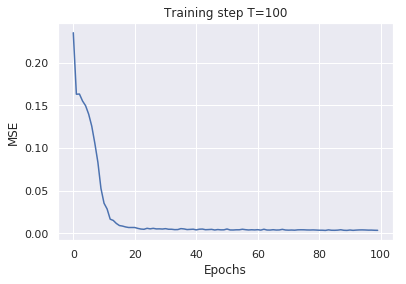

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Training step T=100')
plt.ylabel('MSE')
plt.xlabel('Epochs')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  (None, 128)               17152     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = history.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.plot()

NameError: name 'history' is not defined